<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



https://kliknijadi.mk - to scrape information for all restaurants in Macedonia

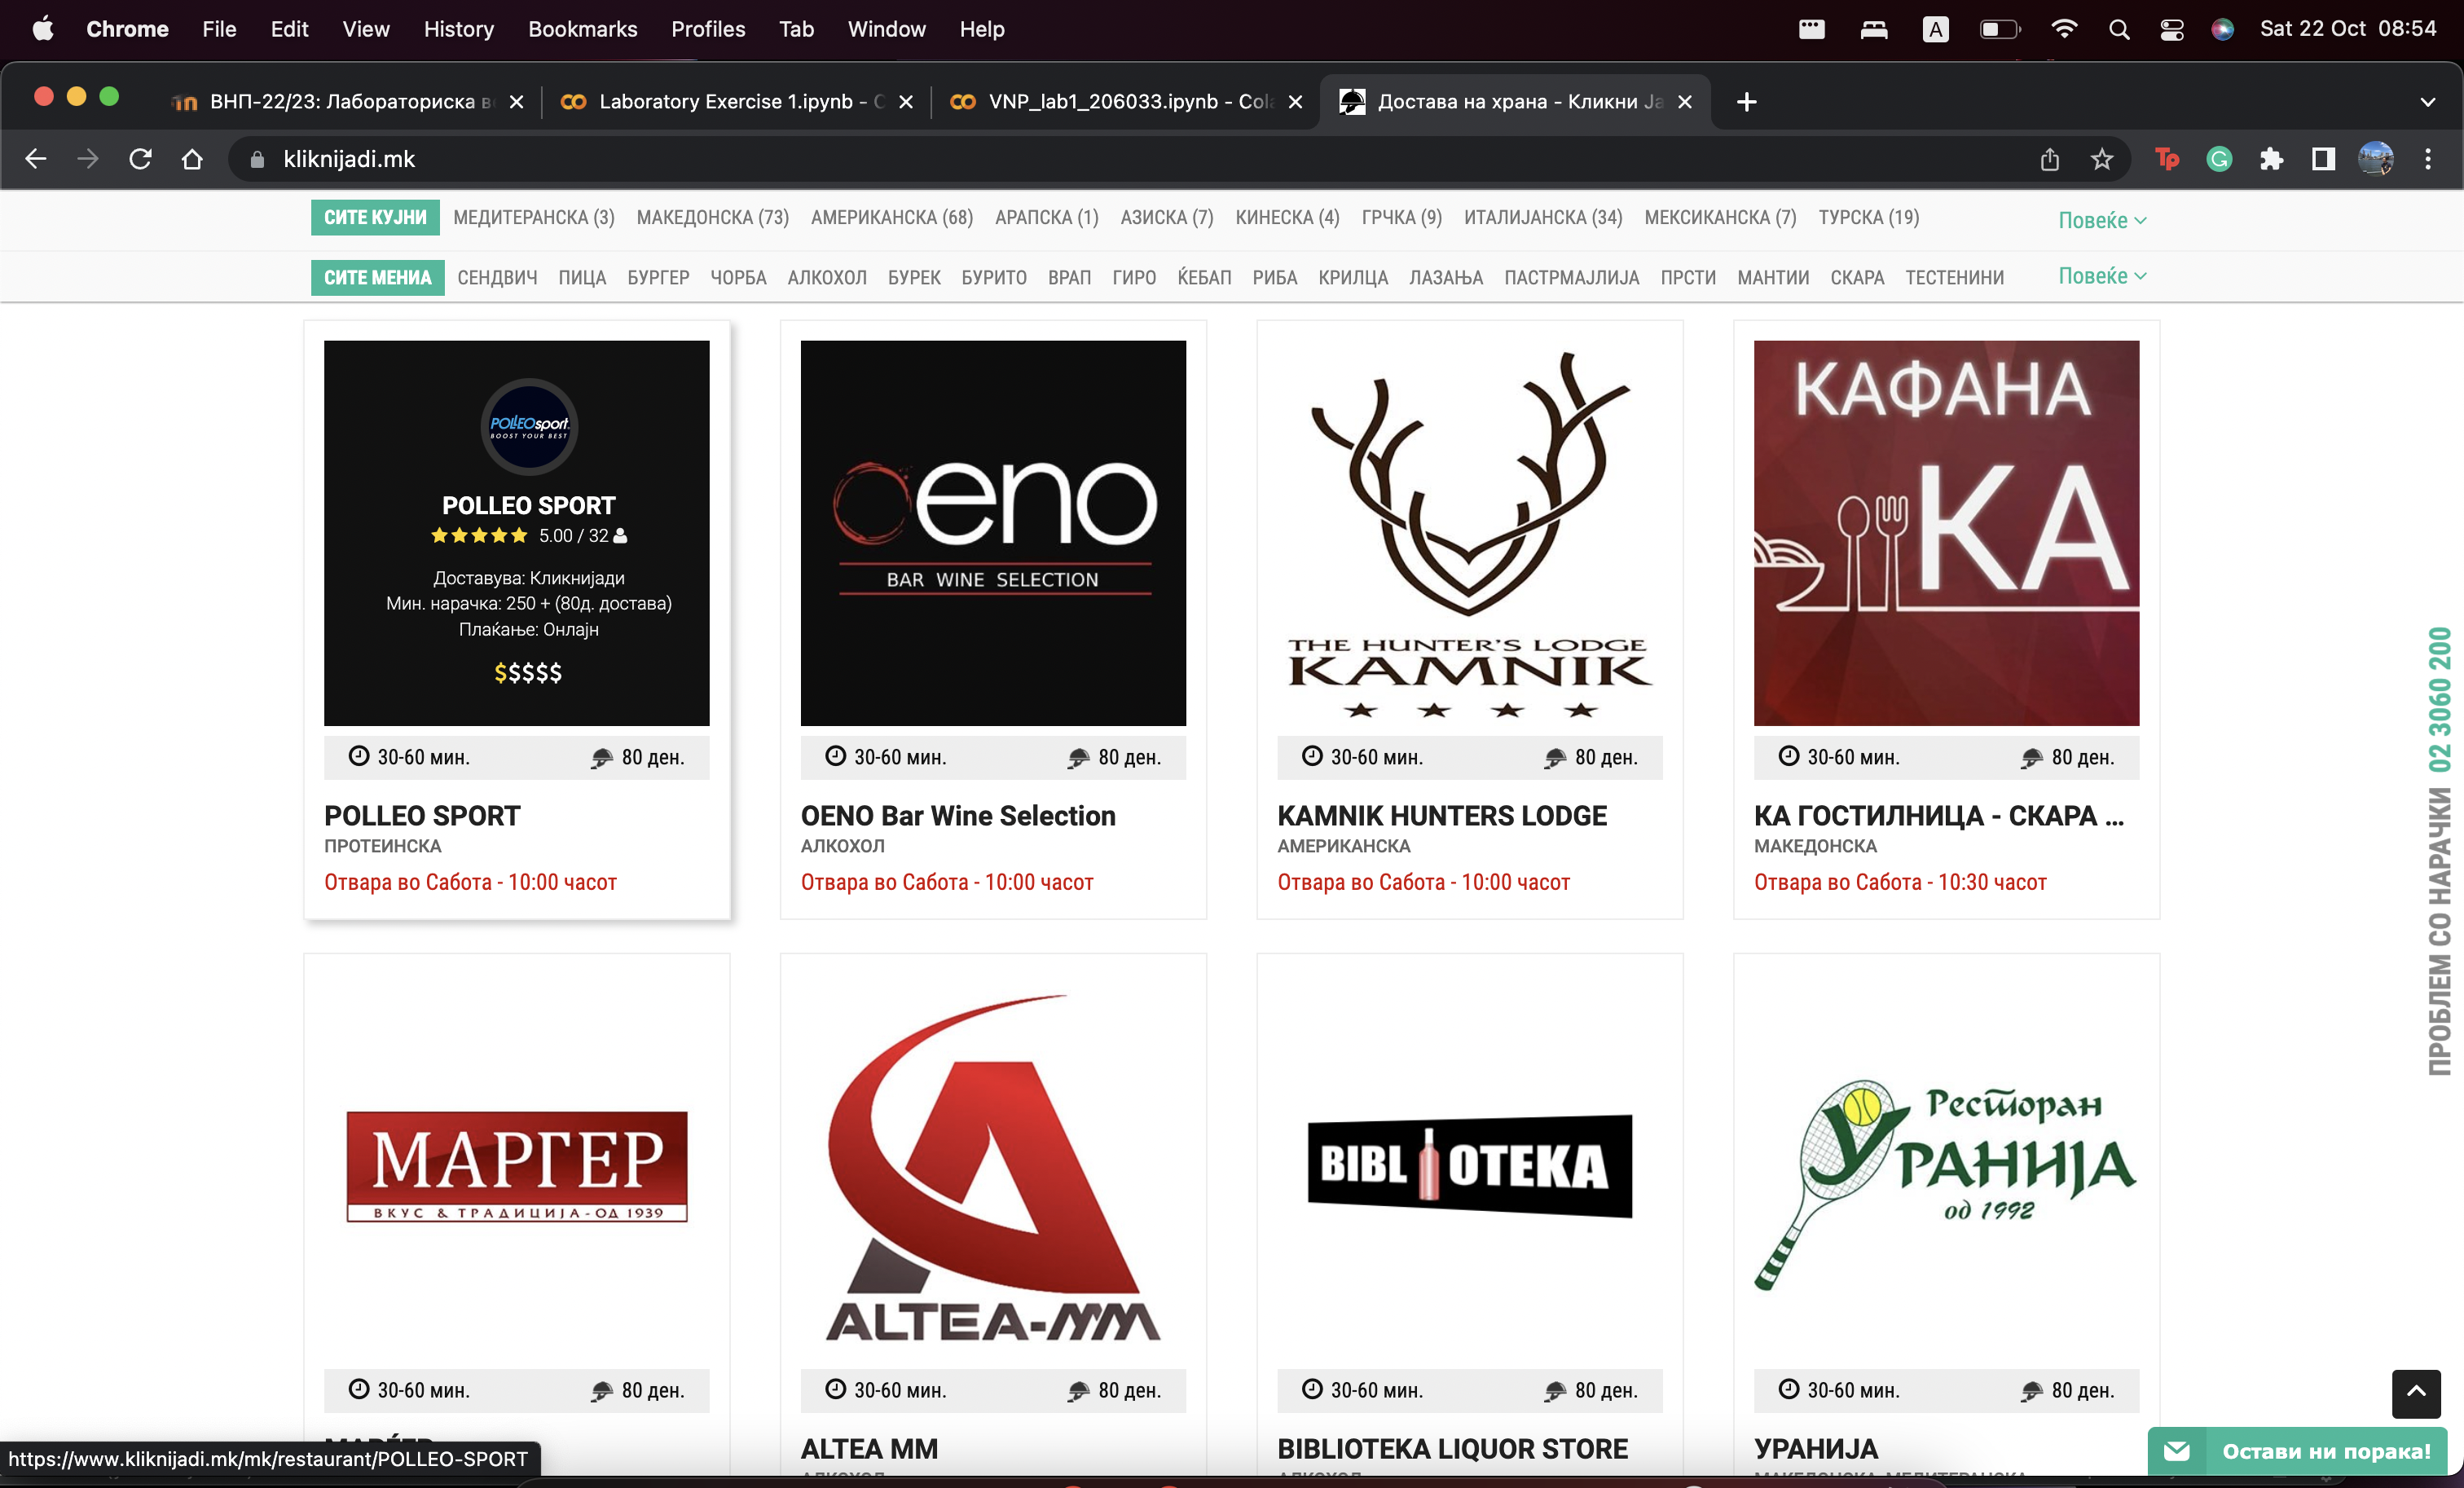

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [ ]:
data = requests.get("https://kliknijadi.mk")
data

<Response [200]>

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
data.status_code

200

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
soup = BeautifulSoup(data.text, "html.parser")

**Print the HTML code that you get**

In [ ]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<title>Достава на храна - Кликни Јади</title>
<meta content="КликниЈади" property="og:site_name"/>
<meta content="Достава на храна - Кликни Јади" property="og:title"/>
<meta content="https://www.KlikniJadi.mk/mk/Home" property="og:url"/>
<meta content="КликниЈади ви овозможува да јадете токму тоа што ви се јаде, кога вие ќе посаката и каде што ќе посакате. Нарачајте ги вашите омилени јадења, од омилените ресторани со само неколку кликнувања, опуштете се и ние ке ви го донесеме јадењето до дома, канцеларија и каде и да посакате вие, во цело Скопје." property="og:description"/>
<meta content="https://www.KlikniJadi.mk/images/flaer.jpg" property="og:image"/>
<meta content="725285734208902" property="fb:app_id"/>
<meta content="website" property="og:type"/>
<meta content="КликниЈади ви овозможува да јадете токму тоа што ви се јаде, кога вие ќе посаката и каде што ќе посакате. Нарачајте ги вашите омилени јадења, од омилените ресторани со само неколк

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`title, category, delivery_price, delivery_time` 

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

### Title

In [ ]:
title_elements = soup.select(".cbp-l-grid-agency-title")
title_elements[:5]

[<div class="cbp-l-grid-agency-title">POLLEO SPORT</div>,
 <div class="cbp-l-grid-agency-title">OENO Bar Wine Selection</div>,
 <div class="cbp-l-grid-agency-title">KAMNIK HUNTERS LODGE</div>,
 <div class="cbp-l-grid-agency-title">КА ГОСТИЛНИЦА - СКАРА НА КИЛО</div>,
 <div class="cbp-l-grid-agency-title">МАРЃЕР</div>]

### Category

In [ ]:
category_elements = soup.select(".cbp-l-grid-agency-desc")
category_elements[:5]

[<div class="cbp-l-grid-agency-desc">Протеинска</div>,
 <div class="cbp-l-grid-agency-desc">Алкохол</div>,
 <div class="cbp-l-grid-agency-desc">Американска</div>,
 <div class="cbp-l-grid-agency-desc">Македонска</div>,
 <div class="cbp-l-grid-agency-desc">Македонска</div>]

### Delivery price

In [ ]:
price_elements = soup.select(".wrap-delivery")
price_elements[:5]

[<div class="wrap-delivery"><img class="dostava-img" src="/Images/mali/dostava.png"> 80 ден.</img></div>,
 <div class="wrap-delivery"><img class="dostava-img" src="/Images/mali/dostava.png"> 80 ден.</img></div>,
 <div class="wrap-delivery"><img class="dostava-img" src="/Images/mali/dostava.png"> 80 ден.</img></div>,
 <div class="wrap-delivery"><img class="dostava-img" src="/Images/mali/dostava.png"> 80 ден.</img></div>,
 <div class="wrap-delivery"><img class="dostava-img" src="/Images/mali/dostava.png"> 80 ден.</img></div>]

### Delivery time

In [ ]:
time_elements = soup.select(".wrap-time")
time_elements[:5]

[<div class="wrap-time"><i class="fa fa-clock-o"></i> 30-60 мин.</div>,
 <div class="wrap-time"><i class="fa fa-clock-o"></i> 30-60 мин.</div>,
 <div class="wrap-time"><i class="fa fa-clock-o"></i> 30-60 мин.</div>,
 <div class="wrap-time"><i class="fa fa-clock-o"></i> 30-60 мин.</div>,
 <div class="wrap-time"><i class="fa fa-clock-o"></i> 30-60 мин.</div>]

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
titles = [el.text for el in title_elements]
categories = [el.text for el in category_elements]
times = [el.text for el in time_elements]
prices = [el.text for el in price_elements]

**Print all lists that are containing the elements**

In [ ]:
print(titles)
print(categories)
print(times)
print(prices)

['POLLEO SPORT', 'OENO Bar Wine Selection', 'KAMNIK HUNTERS LODGE', 'КА ГОСТИЛНИЦА - СКАРА НА КИЛО', 'МАРЃЕР', 'ALTEA MM', 'BIBLIOTEKA LIQUOR STORE', 'УРАНИЈА', 'AMBROSIA NATURAL', 'ALTEA MM пијалоци', 'FOUR', 'PIZZA COSTARICA', 'DISTRIKT BAR & KITCHEN', 'ВОДЕНИЦА МУЛИНО', 'МАЛЕШЕВСКИ МЕРАК', 'СКОПСКИ МЕРАК', 'AMIGOS', 'FISH RESTAURANT', 'АМИГОС ЉУБЉАНСКА', 'ЦЕНТАР БАР', 'REVIJA BAR & FOOD', 'BURGER KING RAMSTORE', 'SARAJEVA STEAK HOUSE', 'ДУКАТ', 'ДВА ЕЛЕНА', 'BURGER KING CITY MALL', 'УРБАН ПЕТ ШОП', 'ОРЕОВ ЛАД', 'GRILL HOUSE', 'BURGER KING CAPITOL MALL', 'BIG FISH RESTAURANT', 'BURGER KING EAST GATE MALL', 'CAKE BOUTIQUE', 'ДЕСТАН ЧАРШИЈА', 'BURGER KING CENTAR', 'BKW Bukowski Hybrid Bar ', 'TRIBECA RESTAURANT AND BAR', 'ПЛАЗА ДЕ ТОРОС', 'FLOWER ATELJE BY TENI', 'FOOD STATION', 'GREEN SALAD', 'THREE KITCHEN AND BAR', 'ЌЕИФ РЕСТОРАН', 'ЛИРА', 'ПЕЛИСТЕР', 'КРЧМА', 'LOVE by Alikas', 'КАФАНА ДЕБАР МААЛО', 'LEVANT taste of middle east', 'MADISON GARDEN Lounge Bar', 'СКАРА НА КИЛО АМИГО', '

**Check if all lists are the same size**

In [ ]:
print(len(titles))
print(len(categories))
print(len(times))
print(len(prices))

228
228
228
228


# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
df = pd.DataFrame(list(zip(titles,categories,times,prices)),columns=['title','category','delivery_time','delivery_price'])
df.head()

title     category delivery_time delivery_price
0                   POLLEO SPORT   Протеинска    30-60 мин.        80 ден.
1        OENO Bar Wine Selection      Алкохол    30-60 мин.        80 ден.
2           KAMNIK HUNTERS LODGE  Американска    30-60 мин.        80 ден.
3  КА ГОСТИЛНИЦА - СКАРА НА КИЛО   Македонска    30-60 мин.        80 ден.
4                         МАРЃЕР   Македонска    30-60 мин.        80 ден.

**Print the dataset you obtain**

In [ ]:
df

title                 category  \
0                                  POLLEO SPORT               Протеинска   
1                       OENO Bar Wine Selection                  Алкохол   
2                          KAMNIK HUNTERS LODGE              Американска   
3                 КА ГОСТИЛНИЦА - СКАРА НА КИЛО               Македонска   
4                                        МАРЃЕР               Македонска   
..                                          ...                      ...   
223                                БРАВИА КУЈНА               Македонска   
224  ПУЛС РЕСТОРАН - ЖАН МИТРЕВ КЛИНИК РЕСТОРАН                   Здрава   
225                                      ГОРСКА                            
226                             ГОСТИЛНИЦА 10ка  Македонска, Американска   
227                                       БУКЕТ               Македонска   

    delivery_time delivery_price  
0      30-60 мин.        80 ден.  
1      30-60 мин.        80 ден.  
2      30-60 мин.        80 ден.  
3      30-60 мин.        80 ден.  
4      30-60 мин.        80 ден.  
..            ...            ...  
223    30-60 мин.        80 ден.  
224    30-60 мин.        80 ден.  
225    30-60 мин.       200 ден.  
226    30-60 мин.        80 ден.  
227    30-60 мин.        80 ден.  

[228 rows x 4 columns]

# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,554 kB]
Hit:13 http://pp
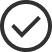

In [1]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results

In [5]:
from selenium.webdriver.common.by import By

In [4]:
wd = webdriver.Chrome(options=options)
wd.get("https://play.google.com/store/movies?hl=en_US&gl=US")

In [13]:
elements = wd.find_elements(By.CLASS_NAME,"VfPpkd-EScbFb-JIbuQc")
len(elements)

155

In [19]:
links = [el.find_element(By.TAG_NAME, 'a') for el in elements]
urls = [el.get_attribute('href') for el in links]
urls[:3]

['https://play.google.com/store/movies/details/Bullet_Train?id=IE8cncuxU1w.P',
 'https://play.google.com/store/movies/details/Top_Gun_Maverick?id=PnS5p3AmpRE.P',
 'https://play.google.com/store/movies/details/The_Invitation?id=PvjU4vB9lY8.P']

In [63]:
print(len(urls))

155


In [64]:
data = []
for url in urls:
  try:
    wd.get(url)
    title = wd.find_element(By.TAG_NAME, 'h1').find_element(By.TAG_NAME, 'span').get_attribute('innerHTML')
    review_count = wd.find_element(By.CLASS_NAME, "g1rdde").text.split(" ")[0]
    comments_buttons = wd.find_elements(By.CLASS_NAME, "VxpoF")
    if len(comments_buttons) <= 1:
      continue
    wd.execute_script("window.scrollTo(0, 1000)")
    comments_buttons[1].click()
    all_comments = [el.text for el in wd.find_elements(By.CLASS_NAME, "h3YV2d")]
    comments_text = ""
    for comm in all_comments:
      comments_text += " /// " + comm
    movie = {"title":title, "reviews":review_count, "comments": comments_text}
    data.append(movie)
  except:
    continue

In [65]:
import pandas as pd

In [67]:
pd.DataFrame(data)

title      reviews  \
0         Bullet Train           58   
1    Top Gun: Maverick          792   
2       The Invitation            9   
3           Clerks III           20   
4      The Retaliators  Tomatometer   
..                 ...          ...   
124         Slash/Back  Tomatometer   
125    Beyond the Neon            2   
126            Old Man            2   
127     The Good House  Tomatometer   
128      Speak No Evil  Tomatometer   

                                              comments  
0     /// They should punish the people that made t...  
1     /// I had really high expectations but it fel...  
2     /// So far the best scary movie this year! //...  
3     /// It is hard to talk about without spoiling...  
4                                                       
..                                                 ...  
124                                                     
125   /// It was a good movie overall, the ending w...  
126   /// Excellent- especially Liana Wright-Mark. ...  
127                                                     
128                                                     

[129 rows x 3 columns]